In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ADNI1_Lables_dir = '../Data_Set/Data_Lables/'
names = ['Subject_ID', 'Sex', 'DX_Group', 'Age']
data = pd.read_csv(ADNI1_Lables_dir + "ADNI1AND2.csv") 
d = data.drop_duplicates(subset = ['Subject_ID'], keep = 'first' )

print('Number of patients:', d['Sex'].count())

Number of patients: 1797


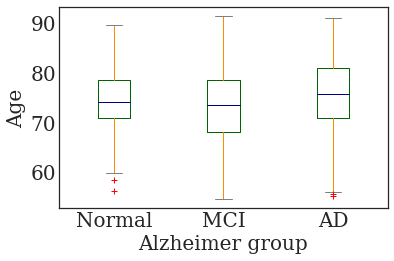

In [14]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',  medians='DarkBlue', caps='Gray')


d_Normal= d[d['DX_Group'] == 'Normal']['Age']
d_Normal = d_Normal.reset_index()
d_Normal.rename(columns={'Age': 'Normal'}, inplace = True)

d_MCI = d[d['DX_Group'] == 'MCI']['Age']
d_MCI = d_MCI.reset_index()
d_MCI.rename(columns={'Age': 'MCI'}, inplace = True)

d_AD  = d[d['DX_Group'] == 'AD']['Age']
d_AD = d_AD.reset_index()
d_AD.rename(columns = {'Age': 'AD'}, inplace = True)

colors = ['pink', 'lightblue', 'lightgreen']
DD = pd.concat([d_Normal['Normal'], d_MCI['MCI'], d_AD['AD']], axis=1)
ax = DD.plot.box( fontsize = 20, color = color, sym = 'r+')
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 20
plt.xlabel('Alzheimer group', fontsize = 20)
plt.ylabel('Age', fontsize = 20)
plt.gcf().subplots_adjust(bottom = 0.18)
plt.gcf().subplots_adjust(left = 0.14)

fig = ax.get_figure()
fig.savefig('./Alzheimer_group_VS_Age.pdf')
plt.show()

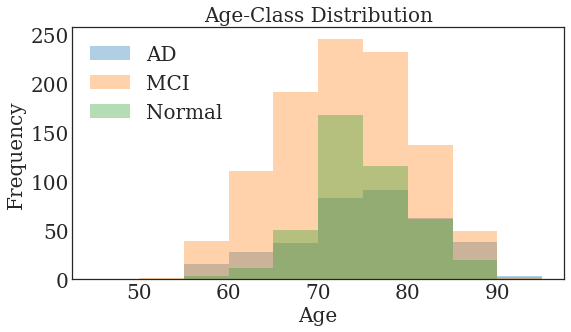

In [15]:
bin_values = np.arange(start = 45, stop = 100, step = 5)
group_Patients = d.groupby('DX_Group')['Age']
ax = group_Patients.plot.hist(bins = bin_values, 
                              figsize = [9,5], alpha = 0.35, legend = True, stacked = True, 
                              fontsize = 20) 

plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 20
plt.title("Age-Class Distribution", fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.gcf().subplots_adjust(bottom = 0.18)
plt.gcf().subplots_adjust(left = 0.14)

plt.savefig('./Age_Class_Distribution.pdf')
plt.show()

In [5]:
bySex       = d.groupby('Sex')
byGroup     = d.groupby('DX_Group')
byAge       = d.groupby('Age')
bySex_Group = d.groupby(['Sex', 'DX_Group'])

In [6]:
bySex.describe()

Age                                                       
     count       mean       std   min     25%   50%     75%   max
Sex                                                              
F    810.0  73.024198  7.226741  55.1  68.425  72.9  78.075  91.0
M    987.0  74.727862  7.109356  54.6  70.250  74.7  79.700  91.5

In [7]:
byGroup.describe()

Age                                                    
           count       mean       std   min   25%   50%    75%   max
DX_Group                                                            
AD         359.0  75.291643  7.882403  55.2  70.9  75.8  80.95  91.0
MCI       1007.0  73.134459  7.385686  54.6  68.1  73.6  78.50  91.5
Normal     431.0  74.779350  5.836144  56.3  71.0  74.1  78.50  89.7

In [8]:
bySex_Group['Age'].describe()

count       mean       std   min     25%    50%     75%   max
Sex DX_Group                                                               
F   AD        165.0  74.315152  7.999829  55.2  70.700  74.50  79.500  91.0
    MCI       428.0  71.943458  7.473618  55.1  66.500  72.00  77.725  89.5
    Normal    217.0  74.174194  5.628620  56.3  70.800  73.80  77.900  89.7
M   AD        194.0  76.122165  7.704603  56.0  71.225  77.15  82.000  90.4
    MCI       579.0  74.014853  7.200742  54.6  69.300  74.30  79.050  91.5
    Normal    214.0  75.392991  5.990140  60.0  71.425  74.60  79.550  89.1